In [1]:
include("fld.jl")
using PyPlot
using CSV

In [2]:

tfinal = 2
println("Running until time $(tfinal)")
#set up Marshak wave problem with large R
Nr = 10
Nz = 10
Lz = 1000
println("Size of domain in Z is $(Lz)")
Lr = 1000

Te = zeros(Nr*Nz) .+ 2.52487e-5
Ti = zeros(Nr*Nz) .+ 2.52487e-5
ErInit = a*Ti.^4
sigma_func(t,T,Nr,Nz,Lr,Lz) = 0.5*abs.(reshape(T,Nr,Nz)).^-2
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0*sigma)
cve_const = 0.3
Cve_func(t,T,Nr,Nz,Lr,Lz) = reshape(cve_const.+T*0, Nr,Nz)
EOSe(t,T,Nr,Nz,Lr,Lz) = cve_const*T
invEOSe(t,E,Nr,Nz,Lr,Lz) = (E/cve_const)
cvi_const = 0.15
Cvi_func(t,T,Nr,Nz,Lr,Lz) = reshape(cvi_const.+T*0, Nr,Nz)
EOSi(t,T,Nr,Nz,Lr,Lz) = cvi_const*T
invEOSi(t,E,Nr,Nz,Lr,Lz) = (E/cvi_const)
gamma_func(t,Te,Ti,Nr,Nz,Lr,Lz) = (Te*0).+ cve_const/0.01 
rho = 3.0

function Qi_func(t,T,Nr,Nz,Lr,Lz)
    tw = 0.1
    tc = 1
    Q = ones(Nr,Nz) .* exp(-(t-tc).^2/(2*tw^2)) * rho*25.06628/sqrt(2*pi)/tw
end
function Qe_func(t,T,Nr,Nz,Lr,Lz)
    Q = zeros(Nr,Nz)
end
    

Running until time 2
Size of domain in Z is 1000


Qe_func (generic function with 1 method)

In [3]:
times, Er_t,Te_t,Ti_t = time_dep_3T(tfinal,0.001,Te,Ti,ErInit,D_func, sigma_func, 
    Qe_func,Qe_func,Qi_func,Cve_func,EOSe,invEOSe,
                      Cvi_func,EOSi,invEOSi,gamma_func,
                      Nr, Nz, Lr, Lz, lower_z="refl", upper_z="refl", upper_r="refl",LOUD=-1);

2001
Step 2001, t = 2.0


In [4]:
ED = convert(Array,CSV.read("/Users/ryanmcclarren/Dropbox/Papers/3T/EvansDensmore.csv", header=0));

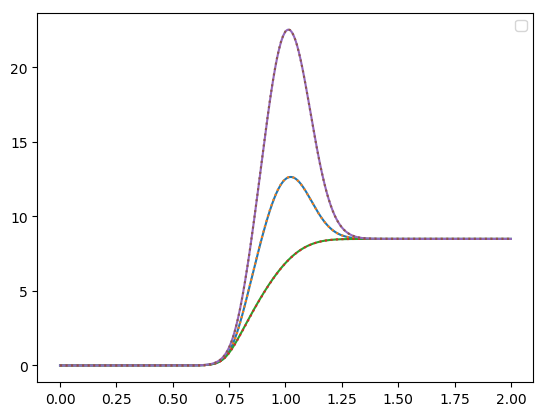

(100, 2002)


No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7ff259421198>

In [5]:
hr = Lr/Nr
hz = Lz/Nz
println(size(Te_t))
T_plot = reshape(Te_t,Nr,Nz,size(times)[1])
plot(times,T_plot[2,2,:])
plot(ED[:,1]/10,ED[:,3],":")
T_plot = (reshape(Er_t,Nr,Nz,size(times)[1])./a).^.25
plot(times,T_plot[2,2,:])
plot(ED[:,1]/10,ED[:,4],":")
T_plot = reshape(Ti_t,Nr,Nz,size(times)[1])
plot(times,T_plot[2,2,:])
plot(ED[:,1]/10,ED[:,2],":")


#xlim(0,0.25)
legend(loc="best")